In [1314]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt


导入数据



In [1315]:
path = 'ex5data1.mat'
data = sio.loadmat(path)
X = data.get('X')
Y = data.get('y')
Xval = data.get('Xval')
Yval = data.get('yval')
Xtest = data.get('Xtest')
Ytest = data.get('ytest')
print(Ytest.shape)

(21, 1)


处理数据，使其变成矩阵


In [1316]:
X_cal = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
X_cal = np.matrix(X_cal)
Xval_cal = np.insert(Xval, 0, values=np.ones(Xval.shape[0]), axis=1)
Xval_cal = np.matrix(Xval_cal)
Y_cal = np.matrix(Y)
Yval_cal = np.matrix(Yval)
theta = np.ones(X_cal.shape[1])

画出X，Y的图像

In [1317]:
def plot(X, Y):
    fig, ax = plt.subplots(figsize = (12,8))
    ax.scatter(X, Y, c= 'red', marker= 'x')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.show()



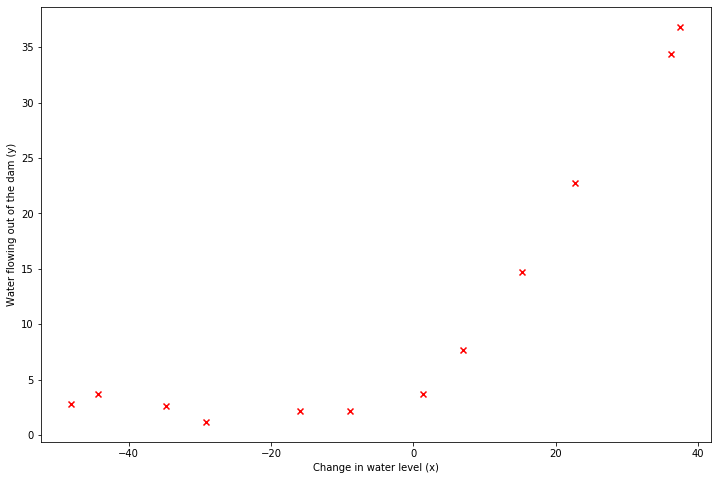

In [1318]:
plot(X, Y)


编写代价函数



In [1319]:
#X要是添加过bias的矩阵，
def cost(theta, X, Y, lamda):
    theta = np.matrix(theta) #(1,2)
    m = X.shape[0]
    first = np.sum(np.multiply(X @ theta.T - Y , X @ theta.T - Y)) / (2 * m)   
    theta = np.delete(theta, 0, axis=1)
    second = lamda * np.sum(np.multiply(theta, theta)) / (2 * m)
    return first + second

#检验cost函数
#cost(theta, X_cal, Y, 1)

编写梯度下降函数

In [1320]:
#X要是添加过bias的矩阵，
def gradient(theta, X, Y, lamda):
    m = X.shape[0]
    theta = np.matrix(theta) #(1,2)
    first = (X.T * (X * theta.T - Y)) / m
    theta = np.delete(theta, 0, axis=1)
    theta = np.insert(theta, 0, values= np.zeros(theta.shape[0]), axis=1)
    second = (lamda / m) * theta.T
    return first + second

#检验gradient函数
#gradient(theta, X_cal, Y, 1)

编写增加特征值以及标准化的函数


In [1321]:
def poly_Normalize(X, p):
    X_poly = X
    if p == 1:
        return X
    else:
        for i in range(2,p + 1):
            X_temp = np.power(X, i)
            X_poly = np.column_stack((X_poly, X_temp))
        for i in range(X_poly.shape[1]):
            aver = np.mean(X_poly[: ,i])
            s = np.std(X_poly[: ,i])
            X_poly[: ,i] = (X_poly[: ,i] - aver) / s
    return X_poly

#检验poly_Normalize函数
# haha = poly_Normalize(X, 1)
# print(haha.shape)

训练线性回归模型,并画出图像

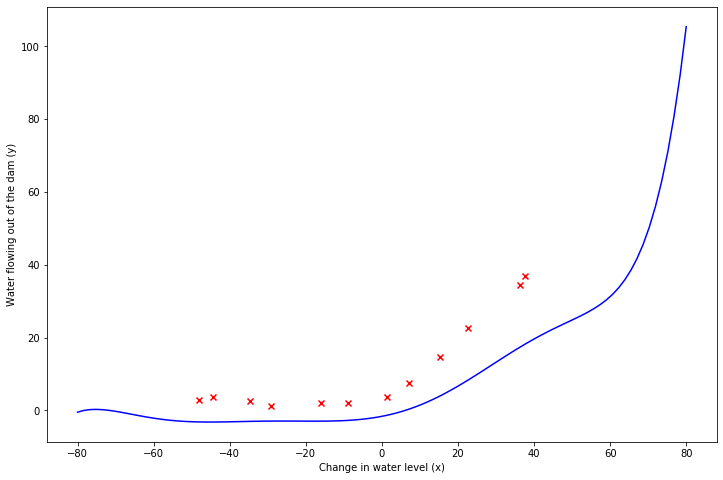

In [1322]:
#X 是未处理过的一维数组，  X_cal是扩展过维数且加过bias的数组
#Y 是未处理过的一维数组，  Y_cal是矩阵，  p是扩展的维数
def train_plot(theta, X, Y, X_cal, Y_cal, p, lamda):
    res = opt.minimize(fun= cost, x0= theta, args= (X_cal, Y_cal, lamda), method='TNC', jac= gradient)
    fig, ax = plt.subplots(figsize = (12,8)) 
    ax.scatter(X, Y, c= 'red', marker= 'x')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    
    #X_row = np.linspace(np.max(X), np.min(X), 100)
    X_row = np.linspace(-80, 80, 100)
    Xp_row_poly = poly_Normalize(X_row, p)
    Xp_row_poly = np.column_stack((np.ones(X_row.shape[0]), Xp_row_poly))
    
    final_theta = res.x
    final_theta = np.matrix(final_theta)
    pre_Y = Xp_row_poly * final_theta.T
    plt.plot(X_row, pre_Y, c= 'blue')
    plt.show()

#检验train_plot函数

X8_cal = poly_Normalize(X, 8)
X8_cal = np.insert(X8_cal, 0, values=np.ones(X8_cal.shape[0]), axis=1)
theta8 = np.zeros(X8_cal.shape[1])
train_plot(theta8, X, Y, X8_cal, Y_cal, 8, lamda=0)




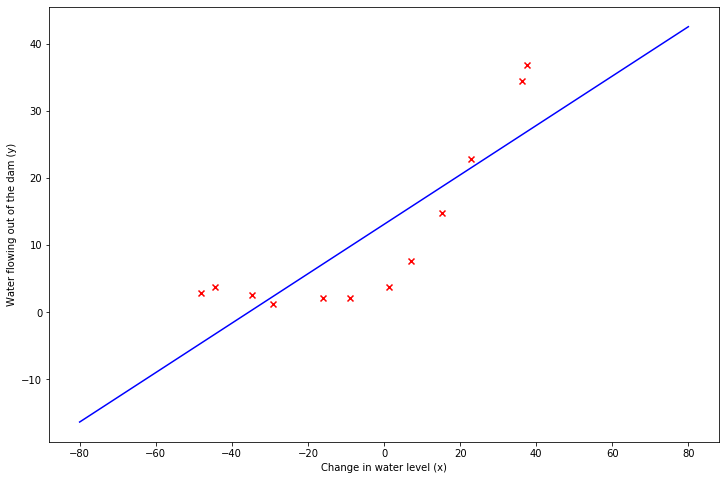

In [1323]:
train_plot(theta, X, Y, X_cal, Y_cal, 1, lamda=0)

画出learning curves



In [1324]:
def learnCurve(theta, X_cal, Y_cal, Xval_cal, Yval_cal, lamda):
    m = X_cal.shape[0]
    error_train = np.ones(m)
    error_val = np.ones(m)
    for i in range(m):
        res_train = opt.minimize(fun= cost, x0= theta, args=(X_cal[:i+1], Y_cal[:i+1], lamda))
        error_train[i] = res_train.fun
        temp_theta = res_train.x
        error_val[i] = cost(temp_theta, Xval_cal, Yval_cal, 0)
        
    print(error_train)
    fig, ax = plt.subplots(figsize = (12,8))
    plt.plot(range(1, m+1), error_train, c= 'blue', label= 'train cost')
    plt.plot(range(1, m+1), error_val, c= 'red', label= 'validation cost')
    plt.legend()
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.title('Learning curve for linear regression')
    plt.show()

[8.10194450e-15 2.08832134e-13 3.28659505e+00 2.84267769e+00
 1.31540488e+01 1.94439625e+01 2.00985217e+01 1.81728587e+01
 2.26094054e+01 2.32614616e+01 2.43172496e+01 2.23739065e+01]


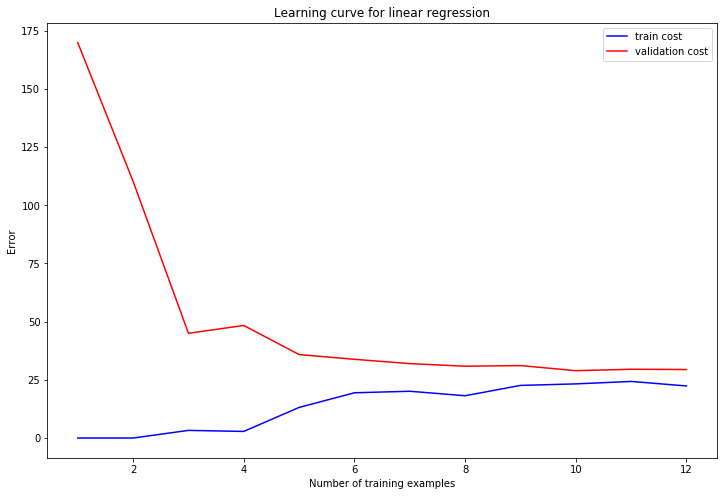

In [1325]:
learnCurve(theta, X_cal, Y_cal, Xval_cal, Yval_cal, lamda=0)




训练8次特征的拟合函数并画出图像


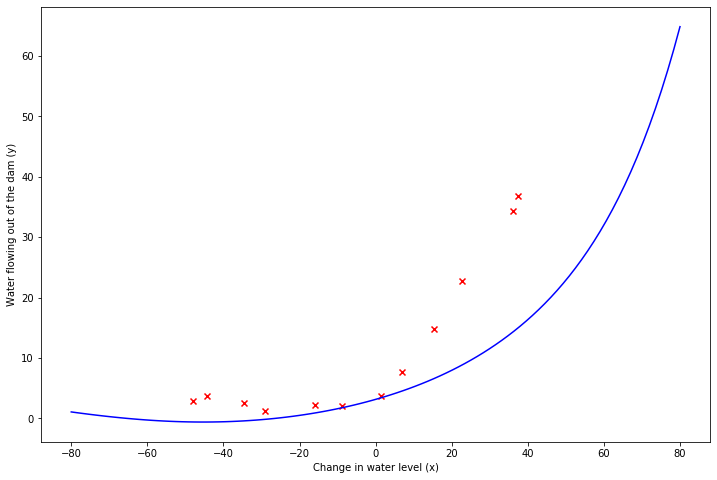

In [1326]:
X8_cal = poly_Normalize(X, 8)
X8_cal = np.insert(X8_cal, 0, values=np.ones(X8_cal.shape[0]), axis=1)
theta8 = np.zeros(X8_cal.shape[1])
train_plot(theta8, X, Y, X8_cal, Y_cal, 8, lamda=1)

画出学习曲线图像

[6.31465459e-16 7.03265517e-02 1.71827272e+01 1.34768994e+01
 1.07815237e+01 9.34701395e+00 8.75438714e+00 7.68218903e+00
 7.27729078e+00 6.59203114e+00 5.99405616e+00 6.83046332e+00]


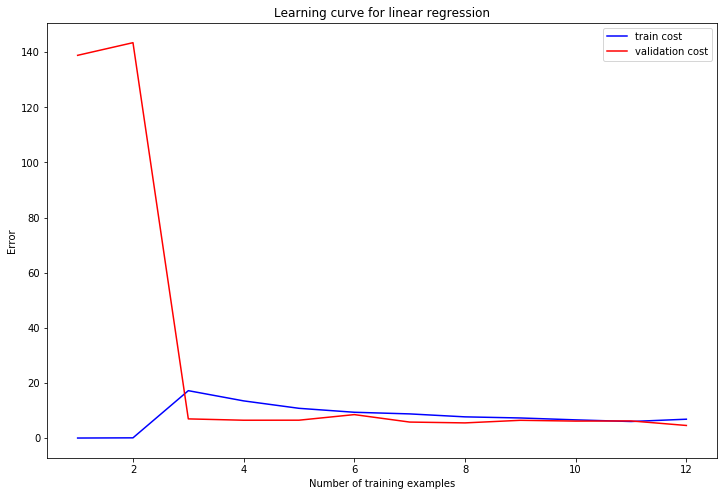

In [1327]:
X8val_cal = poly_Normalize(Xval, 8)
X8val_cal = np.insert(X8val_cal, 0, values=np.ones(X8val_cal.shape[0]), axis=1)
learnCurve(theta8, X8_cal, Y_cal, X8val_cal, Yval_cal, lamda=1)
